In [0]:
!git clone https://github.com/sabiomito/uffgpu2019.git
%cd uffgpu2019
!git checkout linuxRealTime
%cd PROJETO

Cloning into 'uffgpu2019'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 235 (delta 126), reused 183 (delta 74), pack-reused 0
Receiving objects: 100% (235/235), 7.62 MiB | 9.42 MiB/s, done.
Resolving deltas: 100% (126/126), done.
/content/uffgpu2019
Branch 'linuxRealTime' set up to track remote branch 'linuxRealTime' from 'origin'.
Switched to a new branch 'linuxRealTime'
/content/uffgpu2019/PROJETO


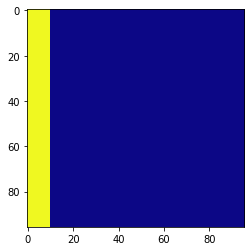

In [0]:
from random import randint
from random import seed
arquivo = open('entrada.txt', 'w')
tam = 96
data = []
for i in range(tam):
  dt = []
  for j in range(tam):
    if(j<10):#(j>tam/2-5 and j<tam/2+4):# and i>128 and i<1024-128):# or (j>120 and j<130 and i >120 and i<130)):
      dt.append(3)
    else:
      dt.append(0)
    
  data.append(dt)


#seed(30)
#for i in range(tam):
#  data[randint(0,tam-1)][randint(0,tam-1)] = 3


for i in range(tam):
  txt = ""
  for j in range(tam):
    txt+=" "+str(data[i][j])
  arquivo.write(txt+"\n")
arquivo.close()


from matplotlib import pyplot as plt
arquivo = open('entrada.txt', 'r')
img = []
for linha in arquivo:
    img.append(list(map(int,linha.split())))
#print(img)
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

In [0]:
import os
def compile(steps):
  !nvcc 2DstencilGPUSharedMemoryKarma.cu  -o go
  string = "./go "+str(steps)
  print(string)
  os.system(string)
  #!./go steps


def compile2(size,order,steps):
  !nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlocking.cu  -o go
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def show():
  arquivo = open('resultado.txt', 'r')
  img = []
  for linha in arquivo:
    img.append(list(map(float,linha.split())))
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  plt.show()
  return img
  #for i in img:
  #  print(i)

from matplotlib import pyplot as plt
def saveToGif(t):
  arquivo = open('resultado.txt', 'r')
  img = []
  for linha in arquivo:
    img.append(list(map(float,linha.split())))
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  name = "animatedFolder/animated"+str(t)
  plt.savefig(name)
  return(name+".png")
  #plt.show()

In [0]:
!nvcc 3DstencilCPU.cpp  -o go
!./go

In [0]:
!nvcc 3DstencilGPUGlobalMemory.cu  -o go
!./go 512 512 160 2

^C


In [0]:
#0.59546
!nvcc 3DstencilGPUSharedMemory.cu -o go
!./go 32 32 4

X 32 || Y 32 
BX 32 || BY 32
GX 1 || GY 1
Z 4 
[4096,0.63600,-94503384.15656],


In [0]:
!nvcc 3DstencilGPUGlobalMemoryCpuBorder.cu  -o go
!./go 4 4 2 4

In [0]:
!nvcc 3DstencilGPUMiciquevicious.cu  -o go
!./go 16 16 80 4

3DstencilGPUMiciquevicious.cu(93): warning: variable "times" was set but never used

3DstencilGPUMiciquevicious.cu(106): warning: variable "k" was set but never used

X 16 || Y 16 
BX 16 || BY 16
GX 1 || GY 1
Z 80 
[20480,0.11018,-94788047.29772],


In [0]:
!nvcc 3DstencilGPUGlobalMemoryCube.cu  -o go
!./go 16 16 16 4

In [0]:
!gcc 2DstencilCPU.cpp -o go
!./go 64 2 8



 coefs 
 1.000000 0.500000
 coefs 


In [0]:
!nvcc 2DstencilGPUGlobalMemory.cu  -o go
!./go 64 8 1


 coefs 
 1.000000 0.800000 0.600000 0.400000 0.200000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.03622],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryCPUBorder.cu  -o go
!./go 4096 8 4


 coefs 
 1.000000 0.800000 0.600000 0.400000 0.200000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.21747],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryBlankBorder.cu  -o go
!./go 64 2 30


 coefs 
 1.000000 0.500000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.29696],


In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorder.cu  -o go
!./go 4096 16 32


 coefs 
 1.000000 0.888889 0.777778 0.666667 0.555556 0.444444 0.333333 0.222222 0.111111
 coefs 
X 4096 || Y 4096 
BX 32 || BY 32 
[16777216,208.23654],


In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu  -o go
!./go 4096 2 3 32 32

2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu(97): warning: variable "sharedTam" was declared but never referenced


 coefs 
 1.000000 0.500000
 coefs 
X 4096 || Y 4096 
BX 32 || BY 32 
[16777216,6.02253],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryBlankBorder.cu -o runGlobal && nvcc 2DstencilGPUSharedMemoryBlankBorder.cu -o runShared && nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu -o runTime && ./runGlobal 4096 4 1 > Global_4096_4.txt && echo 4096 4 1 && ./runGlobal 4096 4 2 >> Global_4096_4.txt && echo 4096 4 2 && ./runGlobal 4096 4 3 >> Global_4096_4.txt && echo 4096 4 3 && ./runGlobal 4096 4 4 >> Global_4096_4.txt && echo 4096 4 4 && ./runGlobal 4096 4 5 >> Global_4096_4.txt && echo 4096 4 5 && ./runGlobal 4096 4 6 >> Global_4096_4.txt && echo 4096 4 6 && ./runGlobal 4096 4 7 >> Global_4096_4.txt && echo 4096 4 7 && ./runGlobal 4096 4 8 >> Global_4096_4.txt && echo 4096 4 8 && ./runGlobal 4096 4 9 >> Global_4096_4.txt && echo 4096 4 9 && ./runGlobal 4096 4 10 >> Global_4096_4.txt && echo 4096 4 1 && ./runGlobal 4096 4 11 >> Global_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 1 > Shared_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 2 >> Shared_4096_4.txt && echo 4096 4 2 && ./runShared 4096 4 3 >> Shared_4096_4.txt && echo 4096 4 3 && ./runShared 4096 4 4 >> Shared_4096_4.txt && echo 4096 4 4 && ./runShared 4096 4 5 >> Shared_4096_4.txt && echo 4096 4 5 && ./runShared 4096 4 6 >> Shared_4096_4.txt && echo 4096 4 6 && ./runShared 4096 4 7 >> Shared_4096_4.txt && echo 4096 4 7 && ./runShared 4096 4 8 >> Shared_4096_4.txt && echo 4096 4 8 && ./runShared 4096 4 9 >> Shared_4096_4.txt && echo 4096 4 9 && ./runShared 4096 4 10 >> Shared_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 11 >> Shared_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 1 > Time_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 2 >> Time_4096_4.txt && echo 4096 4 2 && ./runTime 4096 4 3 >> Time_4096_4.txt && echo 4096 4 3 && ./runTime 4096 4 4 >> Time_4096_4.txt && echo 4096 4 4 && ./runTime 4096 4 5 >> Time_4096_4.txt && echo 4096 4 5 && ./runTime 4096 4 6 >> Time_4096_4.txt && echo 4096 4 6 && ./runTime 4096 4 7 >> Time_4096_4.txt && echo 4096 4 7 && ./runTime 4096 4 8 >> Time_4096_4.txt && echo 4096 4 8 && ./runTime 4096 4 9 >> Time_4096_4.txt && echo 4096 4 9 && ./runTime 4096 4 10 >> Time_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 11 >> Time_4096_4.txt && echo 4096 4 1  

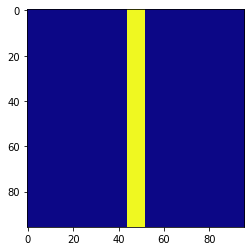

In [0]:
from matplotlib import pyplot as plt
arquivo = open('resultado.txt', 'r')
img = []
for linha in arquivo:
  img.append(list(map(float,linha.split())))
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

./go 96 2 1
./go 96 2 201
./go 96 2 401
./go 96 2 601
./go 96 2 801
./go 96 2 1001
./go 96 2 1201
./go 96 2 1401
./go 96 2 1601
./go 96 2 1801
./go 96 2 2001
./go 96 2 2201
./go 96 2 2401
./go 96 2 2601
./go 96 2 2801
./go 96 2 3001
./go 96 2 3201
./go 96 2 3401
./go 96 2 3601
./go 96 2 3801
./go 96 2 4001
./go 96 2 4201
./go 96 2 4401
./go 96 2 4601
./go 96 2 4801
./go 96 2 5001
./go 96 2 5201
./go 96 2 5401
./go 96 2 5601
./go 96 2 5801
./go 96 2 6001
./go 96 2 6201
./go 96 2 6401
./go 96 2 6601
./go 96 2 6801
./go 96 2 7001
./go 96 2 7201
./go 96 2 7401
./go 96 2 7601
./go 96 2 7801
./go 96 2 8001
./go 96 2 8201
./go 96 2 8401
./go 96 2 8601
./go 96 2 8801
./go 96 2 9001
./go 96 2 9201
./go 96 2 9401
./go 96 2 9601
./go 96 2 9801
./go 96 2 10001
./go 96 2 10201
./go 96 2 10401
./go 96 2 10601
./go 96 2 10801
./go 96 2 11001
./go 96 2 11201
./go 96 2 11401
./go 96 2 11601
./go 96 2 11801


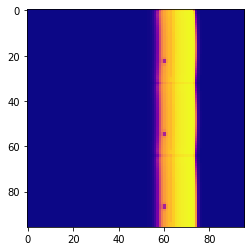

In [56]:

import imageio
'''
filenames = []
for i in range(1,12000,200):
  compile(i)
  filenames.append(saveToGif(i))
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('animatedFolder/animated0.gif', images)
'''

for times in range(2,3,1):
  filenames = []
  for i in range(1,12000,200):
    compile2(96,times,i)
    filenames.append(saveToGif(i))
  images = []
  for filename in filenames:
      images.append(imageio.imread(filename))
  imageio.mimsave('animatedFolder/animated0'+str(times)+'.gif', images)

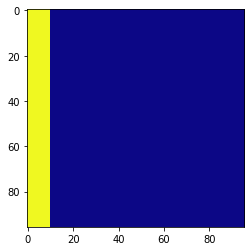

./go 4000


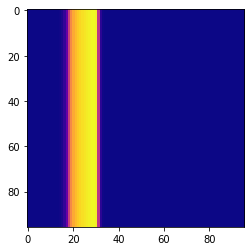

./go 96 2 4000


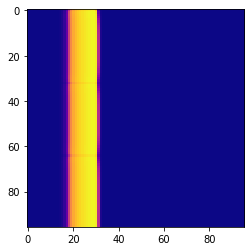

In [49]:
from matplotlib import pyplot as plt
arquivo = open('entrada.txt', 'r')
img = []
for linha in arquivo:
    img.append(list(map(int,linha.split())))
#print(img)
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

#for i in range(1,6000,250):
compile(4000)
img = show()
compile2(96,2,4000)
img = show()

In [0]:
for i in img:
  print(i)

[35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0, 35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0, 35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0]
[36.0, 70.0, 104.0, 138.0, 172.0, 206.0, 240.0, 274.0, 308.0, 342.0, 376.0, 410.0, 444.0, 478.0, 512.0, 546.0, 580.0, 614.0, 648.0, 682.0, 716.0, 750.0, 784.0, 818.0, 852.0, 886.0, 920.0, 954.0, 988.0, 1022.0, 1056.0, 1090.0, 36.0, 70.0, 104.0, 138.0, 172.0, 206.0, 240.0, 274.0, 308.0, 342.0, 376.0, 410.0, 444.0, 478.0, 51

In [0]:
!rm -R uffgpu2019/

In [0]:
!nvidia-smi

Thu Dec  5 03:20:24 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharingOpencvKarma.cu -o go `pkg-config --cflags --libs opencv` -w
!./go 32 2 1


 coefs 
 1.000000 0.500000
 coefs 
Unable to init server: Could not connect: Connection refused

(orig:348): Gtk-WARNING **: 00:36:16.384: cannot open display: 
